Klasifikasi dengan 2 kategori -> Binary Clasification

Klasifikasi lebih dari 2 kategori -> Multiclass Clasification

Linear Regression = Regression Model

Logistic Regression = Classification Model

Logistic Regression -> menghitung probabilitas antara sukses dan tidak sukses

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("bankloan.csv")
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [53]:
data_classification = df[['employ', 'debtinc', 'creddebt', 'othdebt', 'default']].copy()

In [54]:
data_classification.describe()

,employ,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209,0.261429
std,6.658039,6.827234,2.117197,3.287555,0.439727
min,0.000000,0.400000,0.011696,0.045584,0.000000
25%,3.000000,5.000000,0.369059,1.044178,0.000000
50%,7.000000,8.600000,0.854869,1.987567,0.000000
75%,12.000000,14.125000,1.901955,3.923065,1.000000
max,31.000000,41.300000,20.561310,27.033600,1.000000


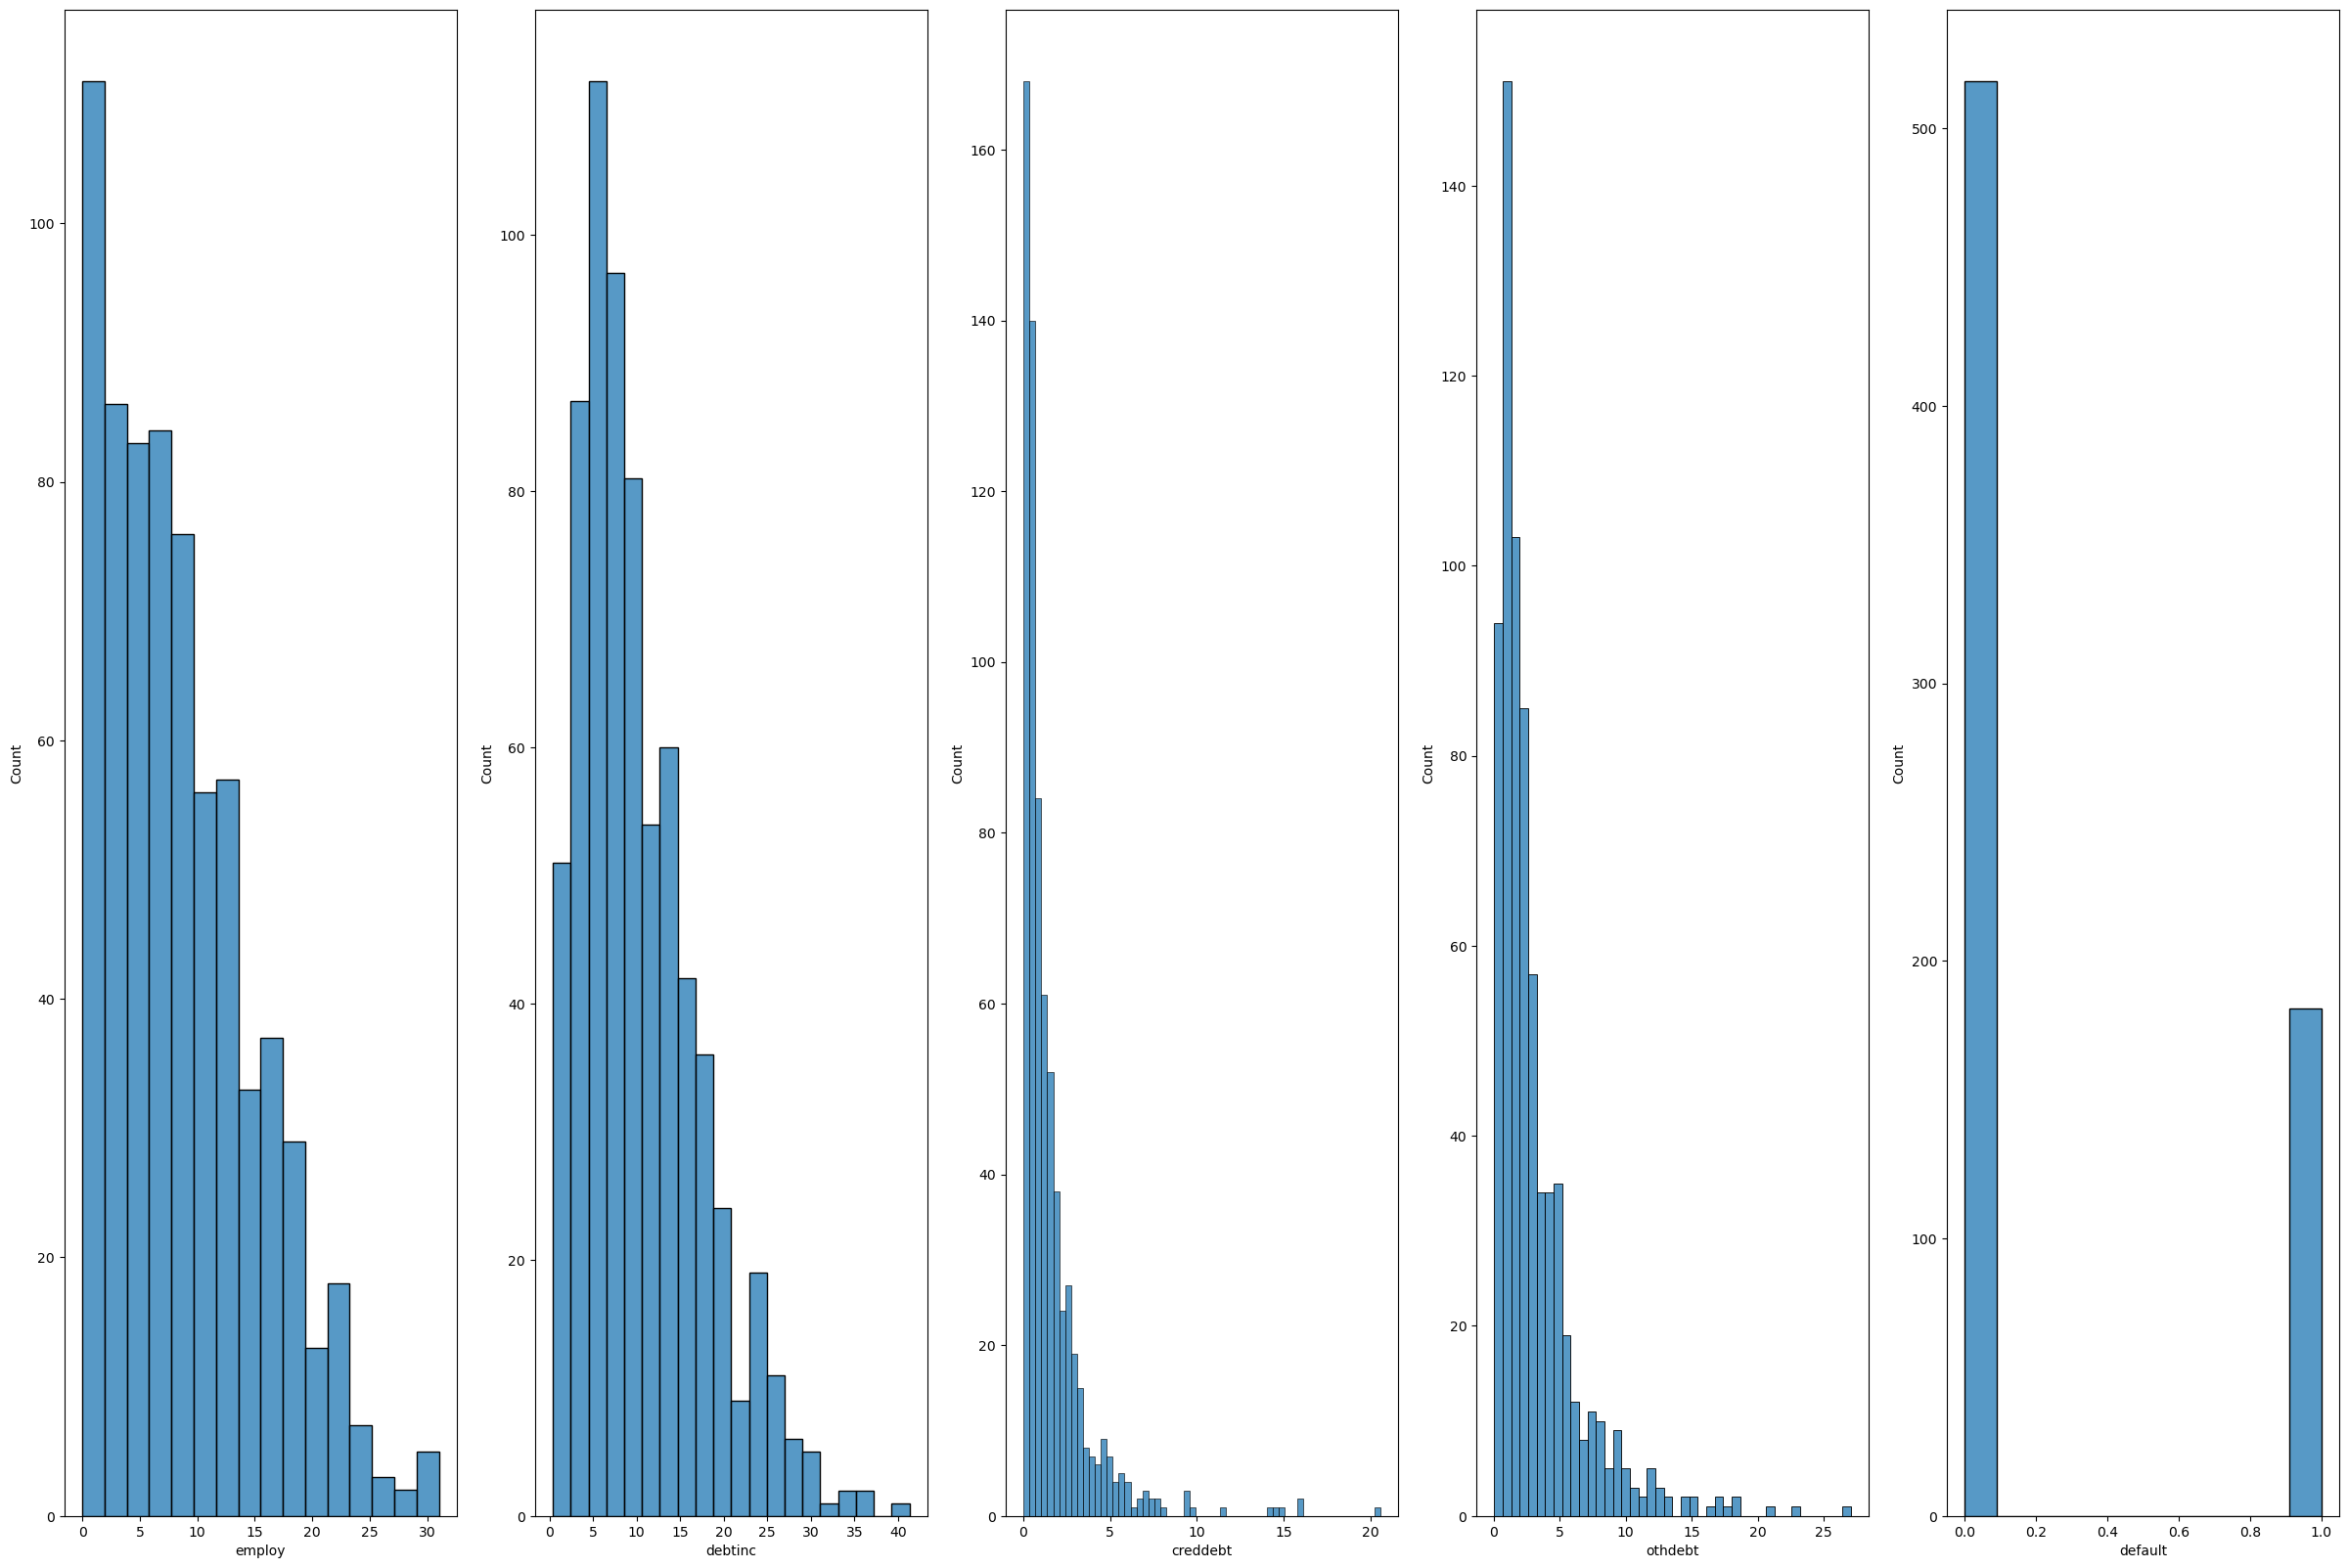

In [55]:
fig, axes = plt.subplots(ncols=5, figsize=(30,20))

for i in range(0,5):
    sns.histplot(
        data = data_classification,
        x = data_classification[data_classification.columns[i]],
        ax = axes[i]
    )

Membuat model machine learning: Classification

In [56]:
import statsmodels.api as sm

Split Data: Train and Test data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    data_classification.drop('default', axis=1), data_classification['default'], test_size=0.2, random_state=13
)

In [59]:
sm_logit = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.418409
         Iterations 7


In [60]:
sm_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  560
Model:                          Logit   Df Residuals:                      555
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 Jan 2025   Pseudo R-squ.:                  0.2636
Time:                        19:55:31   Log-Likelihood:                -234.31
converged:                       True   LL-Null:                       -318.16
Covariance Type:            nonrobust   LLR p-value:                 3.252e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1422      0.258     -4.426      0.000      -1.648      -0.636
employ        -0.2431      0.033     -7.430      0.000      -0.307      -0.179
debtinc        0.0817      0.023      3.601      0.000       0.037       0.126
creddebt       0.4470      0.092      4.879      0.000       0.267       0.627
othdebt        0.0105      0.056      0.187      0.851      -0.100       0.121
==============================================================================
"""

Colinearity Check

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [63]:
calc_vif(data_classification)

,variables,VIF
0,employ,2.365794
1,debtinc,3.947669
2,creddebt,2.917322
3,othdebt,4.141377
4,default,1.750027


Model accuracy validation

In [64]:
y_pred_probability = sm_logit.predict(sm.add_constant(X_test))
y_pred_probability

501    0.596797
478    0.002011
372    0.075426
374    0.003250
336    0.410836
         ...   
334    0.175540
196    0.312584
643    0.122885
390    0.002777
39     0.002185
Length: 140, dtype: float64

In [65]:
import numpy as np

In [66]:
cutoff = 0.5
y_pred = np.where(y_pred_probability > cutoff, 1, 0)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0])

In [120]:
from sklearn.metrics import accuracy_score

print('Model Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred))

Model Accuracy: 0.7214285714285714


Second Method: Menggunakan sklearn

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# Kode untuk membuat model

sklearn_logit = LogisticRegression().fit(X=X_train, y=y_train)

In [70]:
# Kode untuk ngeliat hasil model pake data test

sklearn_logit.score(X=X_test, y=y_test)

0.85

-------------------------------------------

K-Nearest Neighbour

In [71]:
df_knn = pd.read_csv('white_wine.csv')
df_knn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


Ngelakuin pre-processing dulu

In [72]:
df_knn['target'] = np.where(df_knn['quality'] > 6, 1, 0)
df_knn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


<Axes: xlabel='density', ylabel='alcohol'>

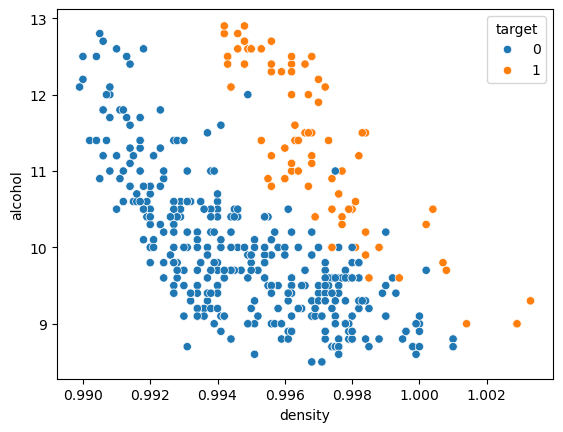

In [73]:
sns.scatterplot(
    data = df_knn,
    x = 'density',
    y = 'alcohol',
    hue = 'target'
)

In [74]:
data_classification_knn = df_knn[['density', 'alcohol', 'target']].copy()

In [75]:
data_classification_knn.describe()

,density,alcohol,target
count,520.000000,519.000000,520.000000
mean,0.995374,10.119461,0.188462
std,0.002613,1.087835,0.391457
min,0.989900,8.500000,0.000000
25%,0.993400,9.300000,0.000000
50%,0.995400,9.900000,0.000000
75%,0.997400,10.700000,0.000000
max,1.003300,12.900000,1.000000


In [76]:
data_classification_knn['alcohol'].fillna(data_classification_knn['alcohol'].mean(), inplace=True)

In [77]:
data_classification_knn.describe()

,density,alcohol,target
count,520.000000,520.000000,520.000000
mean,0.995374,10.119461,0.188462
std,0.002613,1.086787,0.391457
min,0.989900,8.500000,0.000000
25%,0.993400,9.300000,0.000000
50%,0.995400,9.900000,0.000000
75%,0.997400,10.700000,0.000000
max,1.003300,12.900000,1.000000


Testing: Normalized vs Non-Normalized

In [78]:
data_minmax_scaler = data_classification_knn.copy()
data_standard_scaler = data_classification_knn.copy()
data_robust_scaler = data_classification_knn.copy()

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [80]:
data_minmax_scaler['alcohol'] = MinMaxScaler().fit_transform(X = np.reshape(data_minmax_scaler['alcohol'].values, (-1,1)))

In [81]:
data_standard_scaler['alcohol'] = StandardScaler().fit_transform(X = np.reshape(data_standard_scaler['alcohol'].values, (-1,1)))

In [82]:
data_robust_scaler['alcohol'] = RobustScaler().fit_transform(X = np.reshape(data_robust_scaler['alcohol'].values, (-1,1)))

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
data_machine_learning = [data_classification_knn, data_minmax_scaler, data_standard_scaler, data_robust_scaler]

for data in data_machine_learning:
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop('target', axis=1), data['target'], test_size=0.2, random_state=13
    )

    knn_model = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=y_train)
    

In [121]:
scaler_functions = [None, StandardScaler(), MinMaxScaler(), RobustScaler()]

for scaler in scaler_functions:
    X_train, X_test, y_train, y_test = train_test_split(
        data_classification_knn.drop('target', axis=1), data_classification_knn['target'], test_size=0.2, random_state=13, stratify=data_classification_knn['target']
    )
    if scaler is None:
        knn_model = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=y_train)
        y_pred = knn_model.predict(X_test)
        print("Hasil assessment untuk model ", accuracy_score(y_true= y_test, y_pred=y_pred))
    else:
        scaler_fnc = scaler
        scaler_fnc.fit(X_train)
        X_train = scaler_fnc.transform(X_train)
        X_test = scaler_fnc.transform(X_test)
        print(X_train[0:4])
        knn_model = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=y_train)
        y_pred = knn_model.predict(X_test)
        print("Hasil assessment untuk model ", accuracy_score(y_true= y_test, y_pred=y_pred))


Hasil assessment untuk model  0.9615384615384616
[[ 0.41659841 -0.8611312 ]
 [-0.29428109 -0.11775896]
 [-0.51876935  0.34684868]
 [-1.11740471 -0.30360202]]
Hasil assessment untuk model  0.9807692307692307
[[0.49253731 0.15909091]
 [0.35074627 0.34090909]
 [0.30597015 0.45454545]
 [0.18656716 0.29545455]]
Hasil assessment untuk model  0.9807692307692307
[[ 0.275      -0.5       ]
 [-0.2         0.07142857]
 [-0.35        0.42857143]
 [-0.75       -0.07142857]]
Hasil assessment untuk model  0.9807692307692307


In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    data_classification_knn.drop('target', axis=1), data_classification_knn['target'], test_size=0.2, random_state=13, stratify=data_classification_knn['target']
)
scaler_fnc = MinMaxScaler()
scaler_fnc.fit(X_train)
X_train = scaler_fnc.transform(X_train)
X_test = scaler_fnc.transform(X_test)

k_values = []
train_score = []
test_score = []

for k_value in range(1, 20):
    k_values.append(k_value)
    knn_model = KNeighborsClassifier(n_neighbors=k_value).fit(X=X_train, y=y_train)
    y_pred = knn_model.predict(X_train)
    accuracy_temp = accuracy_score(y_true= y_train, y_pred=y_pred)
    print(f"K-Value= {k_value}, Accuracy train untuk model ", accuracy_score(y_true= y_train, y_pred=y_pred))
    train_score.append(accuracy_temp)
    
    y_pred = knn_model.predict(X_test)
    accuracy_temp = accuracy_score(y_true= y_test, y_pred=y_pred)
    print(f"K-Value= {k_value},Accuracy test untuk model ", accuracy_score(y_true= y_test, y_pred=y_pred))
    test_score.append(accuracy_temp)

K-Value= 1, Accuracy train untuk model  0.9951923076923077
K-Value= 1,Accuracy test untuk model  0.9903846153846154
K-Value= 2, Accuracy train untuk model  0.9783653846153846
K-Value= 2,Accuracy test untuk model  0.9711538461538461
K-Value= 3, Accuracy train untuk model  0.9807692307692307
K-Value= 3,Accuracy test untuk model  0.9807692307692307
K-Value= 4, Accuracy train untuk model  0.9735576923076923
K-Value= 4,Accuracy test untuk model  0.9807692307692307
K-Value= 5, Accuracy train untuk model  0.9759615384615384
K-Value= 5,Accuracy test untuk model  0.9807692307692307
K-Value= 6, Accuracy train untuk model  0.9759615384615384
K-Value= 6,Accuracy test untuk model  0.9807692307692307
K-Value= 7, Accuracy train untuk model  0.9735576923076923
K-Value= 7,Accuracy test untuk model  0.9807692307692307
K-Value= 8, Accuracy train untuk model  0.9711538461538461
K-Value= 8,Accuracy test untuk model  0.9711538461538461
K-Value= 9, Accuracy train untuk model  0.9759615384615384
K-Value= 9,Ac

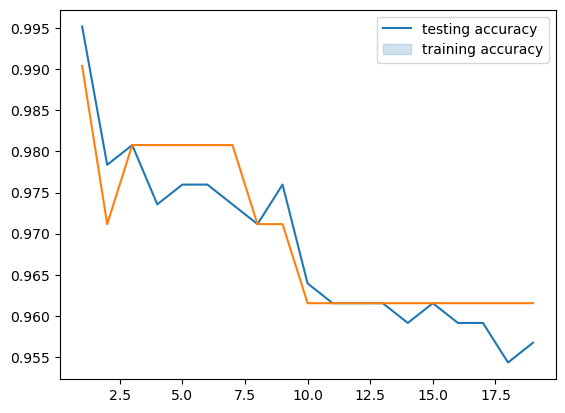

In [96]:
sns.lineplot(x=k_values, y=train_score)
sns.lineplot(x=k_values, y=test_score)
plt.legend(['testing accuracy','training accuracy'])
plt.show()

------------------------------------------------------------------------------

Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3
)

In [87]:
tree_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=3)

In [123]:
print('Model Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred))

Model Accuracy: 0.9615384615384616


In [98]:
from sklearn.tree import plot_tree

In [124]:
tree_depth = []
temp = []

for i in range(2,8):
    tree_model = DecisionTreeClassifier(
        criterion='gini',
        max_depth=2
    )

    tree_model.fit(X=X_train, y=y_train)
    y_pred = tree_model.predict(X_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    tree_depth.append(i)
    temp.append(accuracy) 

------------------------------------------------------------------------------------------------

Overfitting and Underfitting Excercise

In [104]:
df_knn_excercise = pd.read_csv('bankloan.csv')
df_knn_excercise.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [110]:
data_classification_knn_excercise = df_knn_excercise[['employ', 'debtinc', 'creddebt', 'othdebt', 'default']].copy()

In [111]:
data_classification_knn_excercise.describe()

,employ,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209,0.261429
std,6.658039,6.827234,2.117197,3.287555,0.439727
min,0.000000,0.400000,0.011696,0.045584,0.000000
25%,3.000000,5.000000,0.369059,1.044178,0.000000
50%,7.000000,8.600000,0.854869,1.987567,0.000000
75%,12.000000,14.125000,1.901955,3.923065,1.000000
max,31.000000,41.300000,20.561310,27.033600,1.000000


In [112]:
data_minmax_scaler_knn_excercise = data_classification_knn_excercise.copy()
data_standard_scaler_knn_excercise = data_classification_knn_excercise.copy()
data_robust_scaler_knn_excercise = data_classification_knn_excercise.copy()

In [113]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [114]:
data_minmax_scaler_knn_excercise['default'] = MinMaxScaler().fit_transform(X = np.reshape(data_minmax_scaler_knn_excercise['default'].values, (-1,1)))

In [115]:
data_standard_scaler_knn_excercise['default'] = StandardScaler().fit_transform(X = np.reshape(data_standard_scaler_knn_excercise['default'].values, (-1,1)))

In [116]:
data_robust_scaler_knn_excercise['default'] = RobustScaler().fit_transform(X = np.reshape(data_robust_scaler_knn_excercise['default'].values, (-1,1)))

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
data_machine_learning_knn_excercise = [
    data_classification_knn_excercise,
    data_minmax_scaler_knn_excercise,
    data_standard_scaler_knn_excercise,
    data_robust_scaler_knn_excercise
]

for data in data_machine_learning_knn_excercise:
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop('default', axis=1), data['default'], test_size=0.2, random_state=13
    )

    knn_model = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=y_train)
    y_pred = knn_model.predict(X_test)
    print("Hasil assessment untuk model ", accuracy_score(y_true= y_test, y_pred=y_pred))

Hasil assessment untuk model  0.7285714285714285
Hasil assessment untuk model  0.7285714285714285


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [126]:
scaler_functions = [None, StandardScaler(), MinMaxScaler(), RobustScaler()]

for scaler in scaler_functions:
    X_train, X_test, y_train, y_test = train_test_split(
        data_classification_knn_excercise.drop('default', axis=1), data_classification_knn_excercise['default'], test_size=0.2, random_state=13, stratify=data_classification_knn_excercise['default']
    )
    if scaler is None:
        knn_model = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=y_train)
        y_pred = knn_model.predict(X_test)
        print("Hasil assessment untuk model ", accuracy_score(y_true= y_test, y_pred=y_pred))
    else:
        scaler_fnc = scaler
        scaler_fnc.fit(X_train)
        X_train = scaler_fnc.transform(X_train)
        X_test = scaler_fnc.transform(X_test)
        print(X_train[0:4])
        knn_model = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=y_train)
        y_pred = knn_model.predict(X_test)
        print("Hasil assessment untuk model ", accuracy_score(y_true= y_test, y_pred=y_pred))

Hasil assessment untuk model  0.7214285714285714
[[ 1.14178225 -1.17115697 -0.23118271 -0.76902559]
 [ 1.4448145   0.7228834   0.26448582  0.00972483]
 [ 0.68723386 -1.18572651 -0.70509108 -0.78202642]
 [-1.13095967 -0.82148798 -0.58766069 -0.75351835]]
Hasil assessment untuk model  0.75
[[0.51612903 0.05524862 0.05049321 0.02380539]
 [0.58064516 0.41436464 0.10104348 0.13404   ]
 [0.41935484 0.05248619 0.00216212 0.02196509]
 [0.03225806 0.12154696 0.01413814 0.02600049]]
Hasil assessment untuk model  0.7428571428571429
[[ 1.         -0.68766404  0.13892917 -0.48893846]
 [ 1.22222222  0.67716535  0.82148078  0.37200463]
 [ 0.66666667 -0.69816273 -0.51365798 -0.50331144]
 [-0.66666667 -0.43569554 -0.35195255 -0.47179452]]
Hasil assessment untuk model  0.7785714285714286


In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    data_classification_knn_excercise.drop('default', axis=1), data_classification_knn_excercise['default'], test_size=0.2, random_state=13, stratify=data_classification_knn_excercise['default']
)
scaler_fnc = MinMaxScaler()
scaler_fnc.fit(X_train)
X_train = scaler_fnc.transform(X_train)
X_test = scaler_fnc.transform(X_test)

k_values = []
train_score = []
test_score = []

for k_value in range(1, 20):
    k_values.append(k_value)
    knn_model = KNeighborsClassifier(n_neighbors=k_value).fit(X=X_train, y=y_train)
    y_pred = knn_model.predict(X_train)
    accuracy_temp = accuracy_score(y_true= y_train, y_pred=y_pred)
    print(f"K-Value= {k_value}, Accuracy train untuk model ", accuracy_score(y_true= y_train, y_pred=y_pred))
    train_score.append(accuracy_temp)
    
    y_pred = knn_model.predict(X_test)
    accuracy_temp = accuracy_score(y_true= y_test, y_pred=y_pred)
    print(f"K-Value= {k_value},Accuracy test untuk model ", accuracy_score(y_true= y_test, y_pred=y_pred))
    test_score.append(accuracy_temp)

K-Value= 1, Accuracy train untuk model  1.0
K-Value= 1,Accuracy test untuk model  0.6857142857142857
K-Value= 2, Accuracy train untuk model  0.8446428571428571
K-Value= 2,Accuracy test untuk model  0.75
K-Value= 3, Accuracy train untuk model  0.8553571428571428
K-Value= 3,Accuracy test untuk model  0.7428571428571429
K-Value= 4, Accuracy train untuk model  0.8071428571428572
K-Value= 4,Accuracy test untuk model  0.7857142857142857
K-Value= 5, Accuracy train untuk model  0.825
K-Value= 5,Accuracy test untuk model  0.7571428571428571
K-Value= 6, Accuracy train untuk model  0.8053571428571429
K-Value= 6,Accuracy test untuk model  0.7714285714285715
K-Value= 7, Accuracy train untuk model  0.8178571428571428
K-Value= 7,Accuracy test untuk model  0.7714285714285715
K-Value= 8, Accuracy train untuk model  0.8053571428571429
K-Value= 8,Accuracy test untuk model  0.7928571428571428
K-Value= 9, Accuracy train untuk model  0.8089285714285714
K-Value= 9,Accuracy test untuk model  0.792857142857142

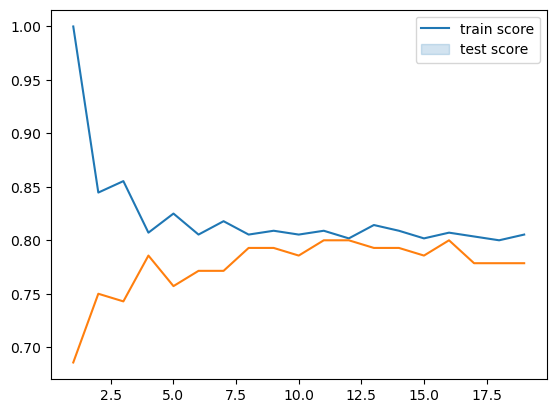

In [130]:
sns.lineplot(x=k_values, y=train_score)
sns.lineplot(x=k_values, y=test_score)
plt.legend(['train score','test score'])
plt.show()